# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
h_dmds = pd.read_csv('C:/Users/user/2. GIT_PROJECTS/Desafios/Projeto 3 - Diamonds/asset-v1_IRONHACK+DAFT+202007_SAO+type@asset+block@diamonds.csv')
rick_dmds = pd.read_csv('C:/Users/user/2. GIT_PROJECTS/Desafios/Projeto 3 - Diamonds/asset-v1_IRONHACK+DAPT+202007_SAO+type@asset+block@rick_diamonds.csv')

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
rick_dmds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [4]:
h_dmds.shape

(48940, 10)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [5]:
def color(x):
    if "D" in x:
        return 6
    elif "E" in x:
        return 5
    elif "F" in x:
        return 4
    elif "G" in x:
        return 3
    elif "H" in x:
        return 2
    elif "I" in x:
        return 1
    elif "J" in x:
        return 0

rick_dmds['color scale'] = rick_dmds["color"].apply(color)
rick_dmds.head()

h_dmds['color scale'] = h_dmds["color"].apply(color)
h_dmds.head()

def cut(x):
    if "Fair" in x:
        return 0
    elif "Good" in x:
        return 1
    elif "Very Good" in x:
        return 2
    elif "Premium" in x:
        return 3
    elif "Ideal" in x:
        return 4

rick_dmds['cut scale'] = rick_dmds["cut"].apply(cut)
rick_dmds.head()

h_dmds['cut scale'] = h_dmds["cut"].apply(cut)
rick_dmds.head()

clarity_dict = {"FL": 1, "IF": 2, "VVS1": 3, "VVS2": 4, "VS1":5, "VS2":6, "SI1":7, "SI2": 8,"I1": 9,"I2":10, "I3": 11}
rick_dmds['clarity scale'] = rick_dmds['clarity'].map(clarity_dict)
h_dmds['clarity scale'] =h_dmds['clarity'].map(clarity_dict)
h_dmds.head()

#cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal":5}
#color_dict = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J":7}
#clarity_dict = {"FL": 1, "IF": 2, "VVS1": 3, "VVS2": 4, "VS1":5, "VS2":6, "SI1":7, "SI2": 8,"I1": 9,"I2":10, "I3": 11}
#h_dmds['cut'] = h_dmds['cut'].map(cut_class_dict)
#h_dmds['clarity'] =h_dmds['clarity'].map(clarity_dict)
#h_dmds['color'] = h_dmds['color'].map(color_dict)
#h_dmds.head()

#cut_class_dict = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal":5}
#color_dict = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J":7}
#clarity_dict = {"FL": 1, "IF": 2, "VVS1": 3, "VVS2": 4, "VS1":5, "VS2":6, "SI1":7, "SI2": 8,"I1": 9,"I2":10, "I3": 11}
#rick_dmds['cut'] = rick_dmds['cut'].map(cut_class_dict)
#rick_dmds['clarity'] = rick_dmds['clarity'].map(clarity_dict)
#rick_dmds['color'] = rick_dmds['color'].map(color_dict)
rick_dmds.head()

,carat,cut,color,clarity,depth,table,x,y,z,color scale,cut scale,clarity scale
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,1,8
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4,1,6
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,2,4,6
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3,4,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3,4,8


With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [94]:
rick_dmds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          5000 non-null   float64
 1   cut            5000 non-null   object 
 2   color          5000 non-null   object 
 3   clarity        5000 non-null   object 
 4   depth          5000 non-null   float64
 5   table          5000 non-null   float64
 6   x              5000 non-null   float64
 7   y              5000 non-null   float64
 8   z              5000 non-null   float64
 9   color scale    5000 non-null   int64  
 10  cut scale      5000 non-null   int64  
 11  clarity scale  5000 non-null   int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 468.9+ KB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [6]:
#your code here
rick_dmds[["color scale", "cut scale", "clarity scale"]] = rick_dmds[["color scale", "cut scale", "clarity scale"]].apply(pd.to_numeric)
h_dmds[["color scale", "cut scale", "clarity scale"]] = h_dmds[["color scale", "cut scale", "clarity scale"]].apply(pd.to_numeric)

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [96]:
h_dmds.describe()

,carat,depth,table,price,x,y,z,color scale,cut scale,clarity scale
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,3.407254,2.683245,5.944544
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.699858,1.350804,1.645542
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,1.000000,5.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000,6.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,5.000000,4.000000,7.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,6.000000,4.000000,9.000000


In [8]:
h_dmds.loc[(h_dmds['x'] != 0) & (h_dmds['y'] != 0) & (h_dmds['z'] == 0), 'z'] = (h_dmds['depth']/100) * ((h_dmds['x'] + h_dmds['y'])/2)

You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [10]:
rick_dmds = rick_dmds[(rick_dmds.x != 0) & (rick_dmds.y != 0) & (rick_dmds.z != 0)]
rick_dmds.describe()
rslt_df = rick_dmds.loc[(rick_dmds['x'] == 0) & (rick_dmds['y'] == 0) & (rick_dmds['z'] == 0)]
rslt_df

#rick_dmds = rick_dmds.drop(rick_dmds[(rick_dmds['x'] == 0) & (rick_dmds['y'] == 0) & (rick_dmds['z'] == 0)].index)

,carat,cut,color,clarity,depth,table,x,y,z,color scale,cut scale,clarity scale


In [9]:
rslt_df_or = rick_dmds.loc[(rick_dmds['x'] == 0) | (rick_dmds['y'] == 0) | (rick_dmds['z'] == 0)]
rslt_df_or

,carat,cut,color,clarity,depth,table,x,y,z,color scale,cut scale,clarity scale
2427,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,3,3,9
2460,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,4,1,8


In [11]:
h_dmds = h_dmds[(h_dmds.x != 0) & (h_dmds.y != 0) & (h_dmds.z != 0)]
#h_dmds.describe()
#rslt_df2 = h_dmds.loc[(h_dmds['x'] == 0) & (h_dmds['y'] == 0) & (h_dmds['z'] == 0)]
#rslt_df2
#h_dmds = h_dmds.drop(h_dmds[(h_dmds['x'] == 0) & (h_dmds['y'] == 0) & (h_dmds['z'] == 0)].index)

In [43]:
rslt_df2_or2 = h_dmds.loc[(h_dmds['x'] == 0) & (h_dmds['y'] == 0) | (h_dmds['z'] == 0)]
rslt_df2_or2

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale


In [38]:
rslt_df2_or = h_dmds.loc[(h_dmds['x'] == 0) & (h_dmds['z'] == 0)]
rslt_df2_or
#h_dmds = h_dmds.drop(h_dmds[(h_dmds['x'] == 0) & (h_dmds['z'] == 0)].index)
#rick_dmds = rick_dmds.drop(rick_dmds[(rick_dmds['x'] == 0) & (rick_dmds['z'] == 0)].index)

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale


In [12]:
rslt_df2_or2 = h_dmds.loc[(h_dmds['x'] == 0) | (h_dmds['y'] == 0) | (h_dmds['z'] == 0)]
h_dmds = h_dmds.drop(h_dmds[(h_dmds['x'] == 0) & (h_dmds['y'] == 0) & (h_dmds['z'] == 0)].index)
h_dmds = h_dmds.drop(h_dmds[(h_dmds['x'] == 0) & (h_dmds['y'] == 0)].index)
rslt_df2_or2
rick_dmds = rick_dmds.drop(rick_dmds[(h_dmds['x'] == 0) & (rick_dmds['y'] == 0) & (rick_dmds['z'] == 0)].index)
rick_dmds = rick_dmds.drop(rick_dmds[(h_dmds['x'] == 0) & (rick_dmds['y'] == 0)].index)
rick_dmds

<ipython-input-12-c28470ef1e2d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rick_dmds = rick_dmds.drop(rick_dmds[(h_dmds['x'] == 0) & (rick_dmds['y'] == 0) & (rick_dmds['z'] == 0)].index)
<ipython-input-12-c28470ef1e2d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rick_dmds = rick_dmds.drop(rick_dmds[(h_dmds['x'] == 0) & (rick_dmds['y'] == 0)].index)


,carat,cut,color,clarity,depth,table,x,y,z,color scale,cut scale,clarity scale
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2,1,8
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,4,1,6
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,2,4,6
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,3,4,5
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,3,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,6,1,8
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,4,4,4
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,4,1,7
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,4,4,3


As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [13]:
h_dmds['z'] = (h_dmds['depth']/100) * ((h_dmds['x'] + h_dmds['y'])/2)

rick_dmds['z'] = (rick_dmds['depth']/100) * ((rick_dmds['x'] + rick_dmds['y'])/2)

**Apply it just to the rows with incorrect values**

In [15]:
#your code here

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [128]:
h_dmds.describe()

,carat,depth,table,price,x,y,z,color scale,cut scale,clarity scale
count,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000
mean,0.797754,61.751901,57.451012,3933.662443,5.731415,5.735037,3.539925,3.407263,2.683329,5.944538
std,0.474090,1.429918,2.232973,3988.486662,1.120193,1.143652,0.696143,1.699894,1.350775,1.645531
min,0.200000,43.000000,43.000000,326.000000,0.000000,3.680000,2.038960,0.000000,0.000000,2.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910060,2.000000,1.000000,5.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.522698,3.000000,3.000000,6.000000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.036780,5.000000,4.000000,7.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,19.728555,6.000000,4.000000,9.000000


----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [17]:
#your code here


Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [18]:
#your code here

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [14]:
from sklearn.linear_model import LinearRegression
K = h_dmds[['carat']]
j = h_dmds['price']
model = LinearRegression()
model.fit(K,j)
price_predict = model.predict(K)
h_dmds['price_pred_lin'] = price_predict
h_dmds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.311270,5,3,7,-626.398052
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.310140,5,1,5,-471.228254
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.630160,1,3,6,-5.718859
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.750385,0,1,8,149.450939
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.480600,0,1,4,-393.643354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.580170,6,3,7,3330.431804
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.499040,6,4,7,3330.431804
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.609320,6,1,7,3330.431804
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.560760,6,1,7,3175.262006


In [15]:
X = rick_dmds[['carat']]
y = rick_dmds['price']
model2 = LinearRegression()
model.fit(X,y)
price_predict2 = model.predict(X)
rick_dmds['price_pred_lin'] = price_predict2
rick_dmds

KeyError: 'price'

In [108]:
h_dmds.corr()

,carat,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin
carat,1.000000,0.027062,0.181717,0.922206,0.977527,0.951945,0.971273,-0.292027,-0.115835,0.353874,1.000000
depth,0.027062,1.000000,-0.296984,-0.012078,-0.025794,-0.029847,0.095565,-0.046312,-0.189419,0.067469,0.027062
table,0.181717,-0.296984,1.000000,0.127850,0.196076,0.184030,0.154458,-0.027523,-0.394230,0.160665,0.181717
price,0.922206,-0.012078,0.127850,1.000000,0.887639,0.866566,0.877989,-0.173194,-0.047697,0.148754,0.922206
x,0.977527,-0.025794,0.196076,0.887639,1.000000,0.972361,0.985815,-0.271109,-0.107143,0.373370,0.977527
y,0.951945,-0.029847,0.184030,0.866566,0.972361,1.000000,0.984624,-0.263830,-0.107084,0.358788,0.951945
z,0.971273,0.095565,0.154458,0.877989,0.985815,0.984624,1.000000,-0.273771,-0.130303,0.374955,0.971273
color scale,-0.292027,-0.046312,-0.027523,-0.173194,-0.271109,-0.263830,-0.273771,1.000000,0.014382,0.024659,-0.292027
cut scale,-0.115835,-0.189419,-0.394230,-0.047697,-0.107143,-0.107084,-0.130303,0.014382,1.000000,-0.162004,-0.115835
clarity scale,0.353874,0.067469,0.160665,0.148754,0.373370,0.358788,0.374955,0.024659,-0.162004,1.000000,0.353874


In [109]:
#sns.pairplot(h_dmds)

In [110]:
rick_dmds.corr()

,carat,depth,table,x,y,z,color scale,cut scale,clarity scale
carat,1.000000,0.039354,0.180932,0.974528,0.972677,0.973957,-0.285754,-0.101683,0.343245
depth,0.039354,1.000000,-0.282624,-0.019754,-0.023776,0.105813,-0.056757,-0.177731,0.066406
table,0.180932,-0.282624,1.000000,0.195087,0.187889,0.155143,-0.016467,-0.403722,0.157260
x,0.974528,-0.019754,0.195087,1.000000,0.997887,0.991316,-0.266868,-0.090745,0.364998
y,0.972677,-0.023776,0.187889,0.997887,1.000000,0.990805,-0.265741,-0.094780,0.361073
z,0.973957,0.105813,0.155143,0.991316,0.990805,1.000000,-0.271489,-0.114486,0.368665
color scale,-0.285754,-0.056757,-0.016467,-0.266868,-0.265741,-0.271489,1.000000,0.012713,0.035884
cut scale,-0.101683,-0.177731,-0.403722,-0.090745,-0.094780,-0.114486,0.012713,1.000000,-0.156591
clarity scale,0.343245,0.066406,0.157260,0.364998,0.361073,0.368665,0.035884,-0.156591,1.000000


In [111]:
#sns.pairplot(rick_dmds)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
#condition = h_dmds['carat'].mean() + 3*h_dmds['carat'].std()
#condition2 = h_dmds['carat'].mean() - 3*h_dmds['carat'].std()
#mask = (h_dmds['carat'] < condition) & (h_dmds['carat'] > condition2)
#h_dmds = h_dmds[mask]
#h_dmds

,carat,cut,color,clarity,depth,table,price,x,y,z,y_pred
0,0.21,4,2,7,59.8,61.0,326,3.89,3.84,2.311270,-692.162892
1,0.23,2,2,5,56.9,65.0,327,4.05,4.07,2.310140,-534.256836
2,0.29,4,6,6,62.4,58.0,334,4.20,4.23,2.630160,-60.538669
3,0.31,2,7,8,63.3,58.0,335,4.34,4.35,2.750385,97.367386
4,0.24,3,7,4,62.8,57.0,336,3.94,3.96,2.480600,-455.303808
...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,4,1,7,62.7,59.0,2757,5.69,5.73,3.580170,3334.441526
48936,0.72,5,1,7,60.8,57.0,2757,5.75,5.76,3.499040,3334.441526
48937,0.72,2,1,7,63.1,55.0,2757,5.69,5.75,3.609320,3334.441526
48938,0.70,3,1,7,62.8,60.0,2757,5.66,5.68,3.560760,3176.535470


In [17]:
h_dmds['price_pred_lin'] = price_pred
h_dmds
plt.plot(K, j, color='cornflowerblue', linewidth=1,
         label='model')

#sns.regplot(X, y, hue = )

NameError: name 'price_pred' is not defined

In [117]:
model.predict(K)

array([-626.40447955, -471.23522185,   -5.72744875, ..., 3330.41159175,
       3175.24233406, 3563.1654783 ])

In [18]:
from sklearn import linear_model, datasets

from sklearn.linear_model import LinearRegression
X = h_dmds[['carat']]
y = h_dmds['price']
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
price_predict2 = ransac.predict(X)
ransac.predict(X)
h_dmds['price_pred_rob'] = price_predict2
h_dmds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin,price_pred_rob
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.311270,5,3,7,-626.398052,-403.991798
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.310140,5,1,5,-471.228254,-265.092107
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.630160,1,3,6,-5.718859,151.606966
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.750385,0,1,8,149.450939,290.506657
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.480600,0,1,4,-393.643354,-195.642262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.580170,6,3,7,3330.431804,3137.950323
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.499040,6,4,7,3330.431804,3137.950323
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.609320,6,1,7,3330.431804,3137.950323
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.560760,6,1,7,3175.262006,2999.050632


In [19]:
condition = h_dmds['x'].mean() + 3*h_dmds['x'].std()
condition2 = h_dmds['x'].mean() - 3*h_dmds['x'].std()
mask = (h_dmds['x'] > condition) | (h_dmds['x'] < condition2)
h_dmds_outliers = h_dmds[mask]
h_dmds_outliers

In [65]:
#sns.heatmap(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

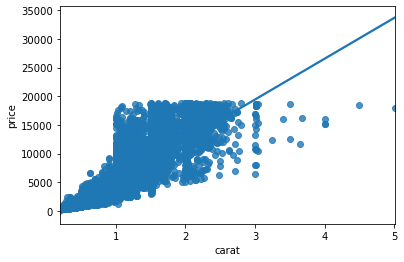

In [136]:
sns.regplot(X, y, robust = True)

In [79]:
#condition = h_dmds['price'].mean() + 3*h_dmds['price'].std()
#condition2 = h_dmds['price'].mean() - 3*h_dmds['price'].std()
#mask = (h_dmds['price'] < condition) | (h_dmds['price'] > condition2)
#h_dmds = h_dmds[mask]
#h_dmds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale,price_pred_robust
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5,7,-626.667610
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,5,-471.480554
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,6,-5.919388
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,8,149.267668
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,4,-393.887027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,6,7,3330.602306
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6,7,3330.602306
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6,7,3330.602306
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6,7,3175.415250


In [62]:
#condition = h_dmds['carat'].mean() + 3*h_dmds['carat'].std()
#condition2 = h_dmds['carat'].mean() - 3*h_dmds['carat'].std()
#mask = (h_dmds['carat'] < condition) | (h_dmds['carat'] > condition2)
#h_dmds = h_dmds[mask]
#h_dmds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale,price_pred_robust
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5,7,-626.667610
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,5,-471.480554
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,6,-5.919388
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,8,149.267668
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,4,-393.887027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,6,7,3330.602306
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6,7,3330.602306
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6,7,3330.602306
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6,7,3175.415250


In [63]:
#condition = h_dmds['y'].mean() + 3*h_dmds['y'].std()
#condition2 = h_dmds['y'].mean() - 3*h_dmds['y'].std()
#mask = (h_dmds['y'] < condition) | (h_dmds['y'] > condition2)
#h_dmds = h_dmds[mask]
#h_dmds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale,price_pred_robust
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5,7,-626.667610
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,5,-471.480554
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,6,-5.919388
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,8,149.267668
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,4,-393.887027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,6,7,3330.602306
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6,7,3330.602306
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6,7,3330.602306
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6,7,3175.415250


In [64]:
#condition = h_dmds['z'].mean() + 3*h_dmds['z'].std()
#condition2 = h_dmds['z'].mean() - 3*h_dmds['z'].std()
#mask = (h_dmds['z'] < condition) | (h_dmds['z'] > condition2)
#h_dmds = h_dmds[mask]
#h_dmds

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,clarity scale,price_pred_robust
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5,7,-626.667610
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,5,5,-471.480554
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,6,-5.919388
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,8,149.267668
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,0,4,-393.887027
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,6,7,3330.602306
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,6,7,3330.602306
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,6,7,3330.602306
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,6,7,3175.415250


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

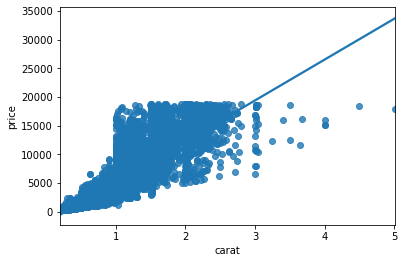

In [59]:
sns.regplot(X, y, robust = True)

In [ ]:
#df.rename(columns = d, inplace = False)

In [55]:
#from sklearn import linear_model, datasets

#ransac = linear_model.RANSACRegressor()
#ransac.fit(X, y)
#ransac.predict(X)
#price_pred = model.predict(X)
#rick_dmds['price_pred_robust'] = price_pred
#rick_dmds

In [144]:
condition = h_dmds['price'].mean() + 3*h_dmds['price'].std()
condition2 = h_dmds['price'].mean() - 3*h_dmds['price'].std()
mask = (h_dmds['price'] > condition) | (h_dmds['price'] < condition2)
h_dmds_outliers = h_dmds[mask]
h_dmds_outliers

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin,price_pred_rob
23927,2.19,Very Good,I,SI2,60.3,60.0,15907,8.29,8.33,5.010930,1,1,8,14735.352033,12202.712162
23928,2.01,Premium,H,VS2,61.1,61.0,15908,8.14,8.09,4.958265,2,3,6,13338.828713,11073.841668
23929,2.14,Premium,I,SI2,60.1,58.0,15915,8.41,8.37,5.042390,1,3,8,14347.428888,11889.137025
23930,2.01,Premium,H,SI2,62.3,58.0,15917,8.11,8.06,5.036955,2,3,8,13338.828713,11073.841668
23931,2.39,Premium,H,SI1,61.8,58.0,15917,8.57,8.52,5.280810,2,3,7,16287.044610,13457.012711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25148,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.008300,2,1,7,13261.244084,11011.126640
25149,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.103125,3,4,8,13804.336486,11450.131832
25150,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.559630,3,4,2,9459.597271,7938.090295
25151,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.038725,3,1,7,13261.244084,11011.126640


In [145]:
condition = h_dmds['price'].mean() + 3*h_dmds['price'].std()
condition2 = h_dmds['price'].mean() - 3*h_dmds['price'].std()
mask = (h_dmds['price'] < condition) & (h_dmds['price'] > condition2)
h_dmds2 = h_dmds[mask]
h_dmds2

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin,price_pred_rob
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.311270,5,3,7,-626.404480,-214.863275
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.310140,5,1,5,-471.235222,-89.433220
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.630160,1,3,6,-5.727449,286.856945
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.750385,0,1,8,149.441809,412.287000
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.480600,0,1,4,-393.650593,-26.718192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.580170,6,3,7,3330.411592,2983.603126
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.499040,6,4,7,3330.411592,2983.603126
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.609320,6,1,7,3330.411592,2983.603126
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.560760,6,1,7,3175.242334,2858.173071


In [137]:
#sns.regplot(y, X, robust = True)
h_dmds.describe()

,carat,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin,price_pred_rob
count,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000,48934.000000
mean,0.797754,61.751901,57.451012,3933.662443,5.731415,5.735037,3.539925,3.407263,2.683329,5.944538,3933.662443,3471.237007
std,0.474090,1.429918,2.232973,3988.486662,1.120193,1.143652,0.696143,1.699894,1.350775,1.645531,3678.206620,2973.254272
min,0.200000,43.000000,43.000000,326.000000,0.000000,3.680000,2.038960,0.000000,0.000000,2.000000,-703.989108,-277.578302
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910060,2.000000,1.000000,5.000000,847.703469,976.722247
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.522698,3.000000,3.000000,6.000000,3175.242334,2858.173071
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.036780,5.000000,4.000000,7.000000,5813.119715,4990.484004
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,19.728555,6.000000,4.000000,9.000000,36614.217368,29888.349905


To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [22]:
#your code here
h_dmds.price.quantile(0.75)
h75 = h_dmds[h_dmds.price > h_dmds.price.quantile(.75)]

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

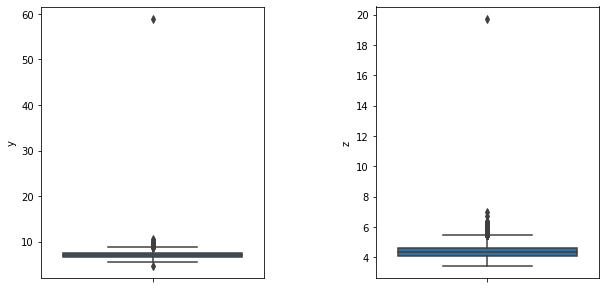

In [23]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=h75.y, ax=ax[0])
sns.boxplot(y=h75.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [31]:
h_out = h_dmds.loc[h_dmds['z'] > 10]
h_out

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin,price_pred_rob


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [34]:
h_dmds.loc[h_dmds.z > 10, "z"] = 0
h_dmds.loc[h_dmds['z'] == 0,'z'] = np.nan

Let's check if we actually corrected the outlier.

In [35]:
h_dmds.loc[48410]

carat                 0.7
cut               Premium
color                   G
clarity               VS2
depth                58.1
table                  55
price                2657
x                    5.83
y                     5.8
z                 3.37851
color scale             3
cut scale               3
clarity scale           6
price_pred_lin    3175.26
price_pred_rob    2999.05
Name: 48410, dtype: object

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [ ]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [37]:
h_out_y = h_dmds.loc[h_dmds['y'] > 10]
h_out_y

,carat,cut,color,clarity,depth,table,price,x,y,z,color scale,cut scale,clarity scale,price_pred_lin,price_pred_rob
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,NaN,2,3,8,13261.298893,12027.530548
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17320,1,3,9,28855.863619,25986.949497
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.96920,0,0,9,36614.353533,32931.934048
25047,4.50,Fair,J,I1,65.8,58.0,18531,10.23,10.16,6.70831,0,0,9,32657.523677,29389.991927
44603,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,NaN,5,4,5,1701.148922,1679.503567


We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [38]:
h_dmds.loc[h_dmds.y > 10, "y"] = 0
h_dmds.loc[h_dmds['y'] == 0,'y'] = np.nan

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

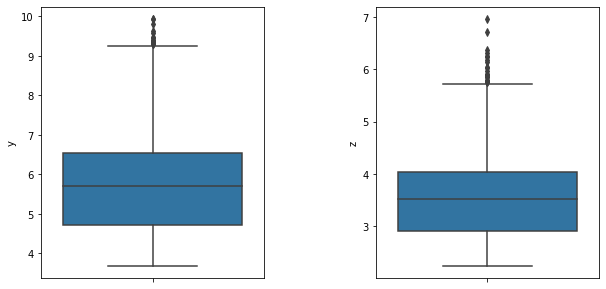

In [41]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=h_dmds.y, ax=ax[0])
sns.boxplot(y=h_dmds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

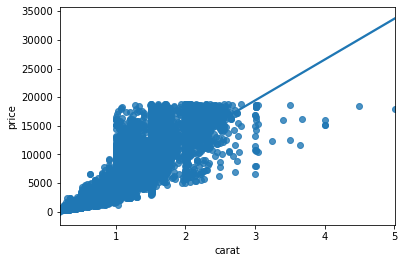

In [42]:
sns.regplot(X, y, robust = True)

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [47]:
#your code here
h_dmds.to_csv(r'C:/Users/user/2. GIT_PROJECTS/Desafios/Projeto 3 - Diamonds/M2-project/diamonds_clean.csv', index = True)
